# Setup

In [10]:
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

report_file = '/var/dws/wafer/wafer_test_1.xlsx'

bin_nm = 'Bin26'
filter_col = 'Op.'
filter_value = 'CP2'
detcol_nm = 'Tester'
detcol2_nm = 'P/C'

def add_bin_avg(table, attr, bin_avg):
    bin_curr_avg = 0
    if attr in output:
        bin_curr_avg = table[attr]
    table[attr] = bin_curr_avg + bin_avg
    

def sum_bin(row):
    bin_sum = 0
    for j in row.index:
        if 'Bin' in j:
            bin_sum = bin_sum+row[j]
    return bin_sum

# Load Data

In [11]:
sheet = pd.read_excel(io=report_file, header=8)

In [12]:
output={}

for i in sheet.index.values:
    row_data=sheet.loc[i]
    sum = sum_bin(row_data)
    # if row_data[filter_col] == filter_value:
    bin_count = row_data[bin_nm]
    add_bin_avg(output, row_data[detcol_nm]+'_'+row_data[detcol2_nm], bin_count/sum)

# output = sorted(output.items(), key=lambda d: d[0])

# Draw

[6, 48, 48, 6, 49, 49, 49, 50, 6, 6, 49, 6, 50, 6, 50, 6, 49, 48, 45, 48, 49, 49, 49, 45, 37, 6, 6, 37, 34, 48, 48, 34, 34, 37, 49, 48, 37, 37, 34]
[776109, 776110, 776109, 776112, 776112, 776104, 776110, 776110, 776110, 776108, 776101, 776104, 776112, 776102, 776111, 776111, 776107, 776102, 776107, 776112, 776109, 776106, 776103, 776111, 776103, 776105, 776106, 776108, 776102, 776104, 776107, 776108, 776111, 776109, 776105, 776106, 776110, 776104, 776109]


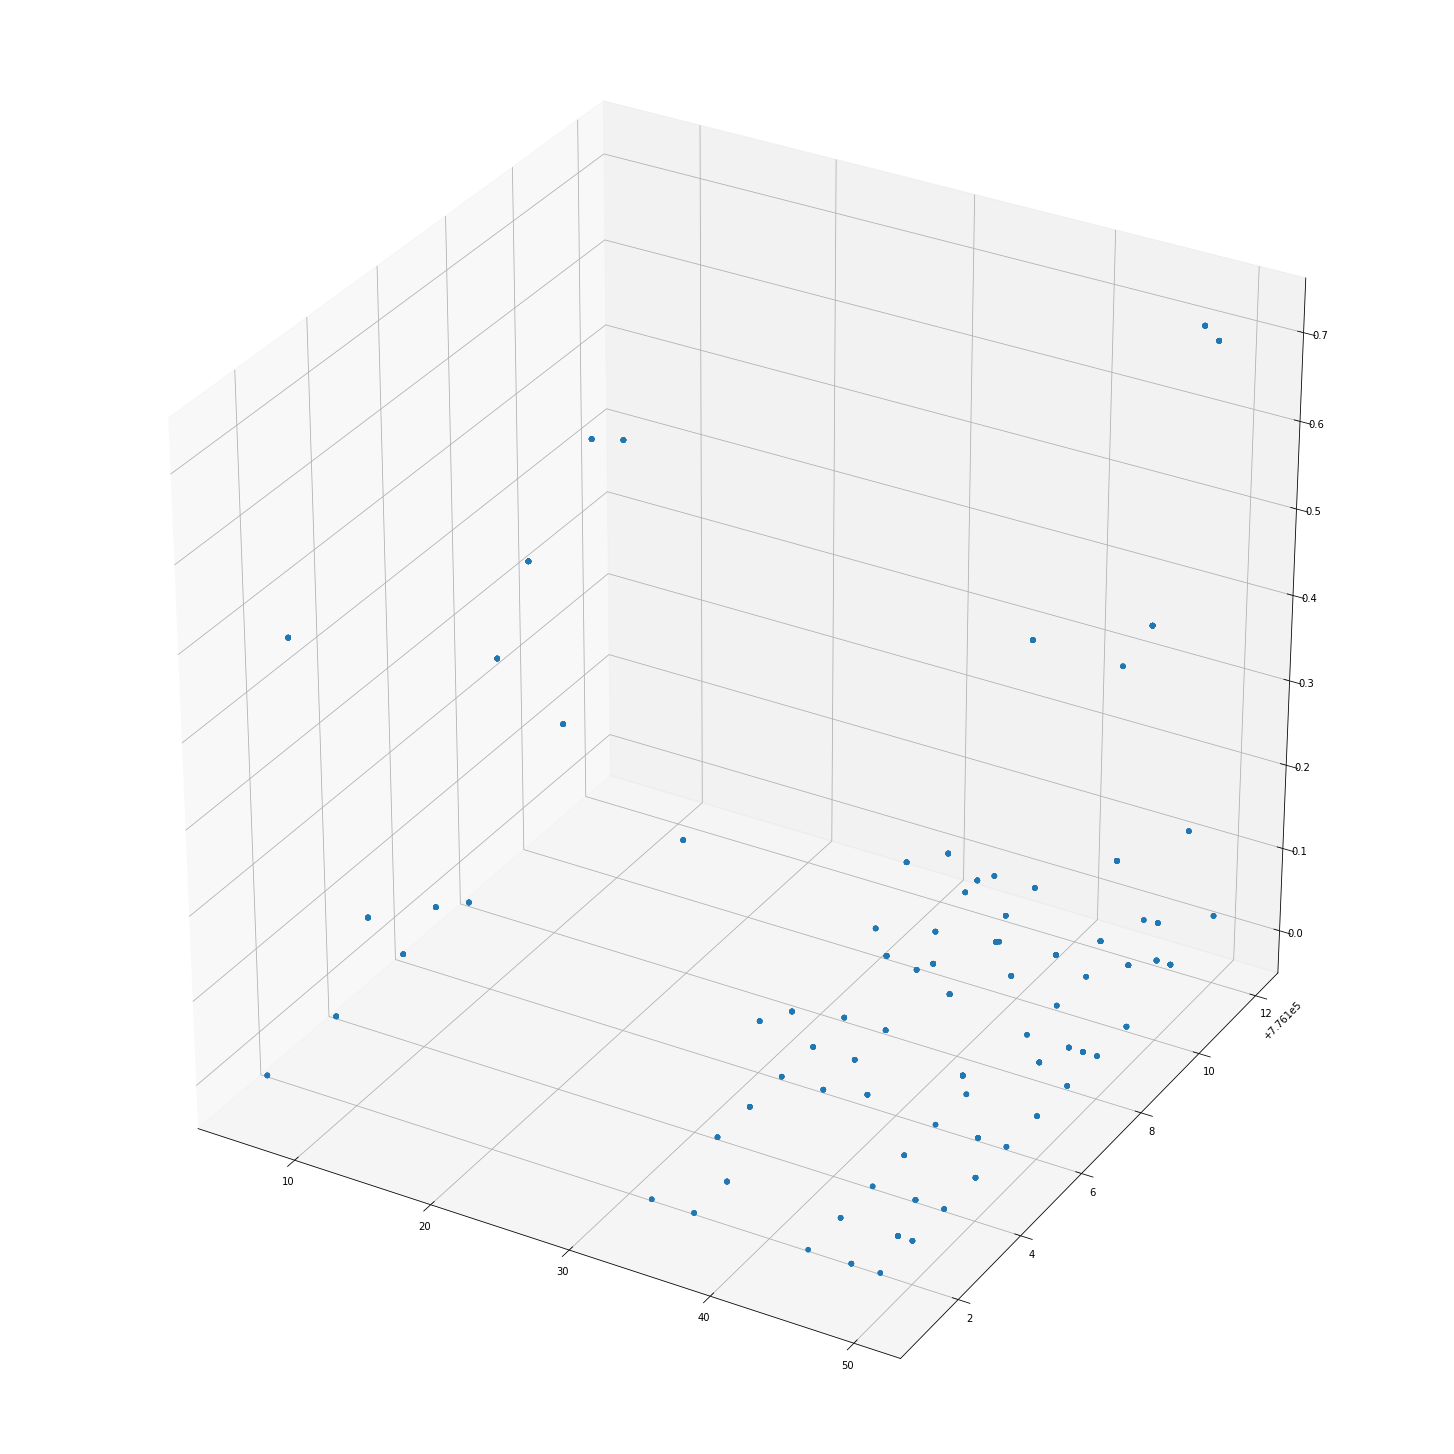

In [13]:
fig=plt.figure(figsize=(20,20))

ax = Axes3D(fig)

X = []
X0 = []
Y = []
Y0 = []
for k, v in output.items():
    X.append(int(re.sub('[\D_]+', '', k.split('_')[0])))
    X0.append(k.split('_')[0])
    Y.append(int(re.sub('[\D_]+', '', k.split('_')[1])))
    Y0.append(k.split('_')[1])

print(X)
print(Y)
    
X, Y = np.meshgrid(X, Y)
X0, Y0 = np.meshgrid(X0, Y0)
Z = np.zeros((X.shape[0],X.shape[1]))

for i in range(0,X.shape[0]):
    for j in range(0,X.shape[1]):
        try:
            Z[i][j] = output[X0[i][j]+'_'+Y0[i][j]]
        except Exception:
            pass

ax.scatter(X, Y, Z)
